In [1]:
import csv
import pandas as pd
pd.options.display.max_colwidth = 4000
from bs4 import BeautifulSoup
from selenium import webdriver
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--window-size=1920,1080")
driver = webdriver.Chrome(options=chrome_options)

In [3]:
url="https://www.amazon.in/"

In [4]:
def get_url(search_term):
    """ Generate a URL for the search term"""
    template="https://www.amazon.in/s?k={}&crid=3JKZD4EXHPZC&sprefix=%2Caps%2C432&ref=nb_sb_ss_recent_1_0_recent"
    search_term=search_term.replace(' ','+')
    return template.format(search_term)

In [6]:
url=get_url('iphon')
print(url)

https://www.amazon.in/s?k=iphon&crid=3JKZD4EXHPZC&sprefix=%2Caps%2C432&ref=nb_sb_ss_recent_1_0_recent


In [7]:
driver.get(url)

In [8]:
soup=BeautifulSoup(driver.page_source,'html.parser')

In [9]:
results=soup.find_all('div',{'data-component-type':'s-search-result'})

In [10]:
len(results)

16

In [11]:
item=results[0]

In [12]:
item.h2.a.text.strip()

'Apple iPhone 12 (64GB) - White'

In [13]:
price_parent=item.find('span','a-price')

In [14]:
price=price_parent.find('span','a-price-whole').text.strip()
price

'53,999'

In [15]:
rating=item.i.text.strip()

In [16]:
item.find('span',{'class':'a-size-base'}).text

'31,045'

In [17]:
atag=item.h2.a

In [18]:
url="https://www.amazon.in"+atag.get('href')

In [19]:
def get_url(search_term):
    """ Generate a URL for the search term"""
    template="https://www.amazon.in/s?k={}&crid=3JKZD4EXHPZC&sprefix=%2Caps%2C432&ref=nb_sb_ss_recent_1_0_recent"
    search_term=search_term.replace(' ','+')
    
    #add term query to url
    url=template.format(search_term)
    
    #add page query place holder
    url += '&page{}'
    
    return url

In [20]:
def extract_record(item):
    # Extract description and URL
    atag = item.h2.a
    description = atag.text.strip()
    url = "https://www.amazon.in" + atag.get('href')

    try:
        # Extract price
        price_parent = item.find('span', 'a-price')
        price = price_parent.find('span', 'a-price-whole').text.strip()
    except AttributeError:
        return

    try:
        # Extract rank and rating
        rating = item.i.text
        review_count = item.find('span', {'class': 'a-size-base'}).text
    except AttributeError:
        rating = ''
        review_count = ''

    result = (description, price, rating, review_count, url)

    return result


def search_query(search_term):
    """Run the main program routine"""
    # Set up Chrome webdriver options
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run Chrome in headless mode

    # Start up the webdriver
    # Replace the path with your own Chrome driver path
    driver = webdriver.Chrome(options=chrome_options)

    records = []
    url = get_url(search_term)

    # Iterate over search result pages (up to 20 pages)
    for page in range(1, 21):
        driver.get(url.format(page))
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        results = soup.find_all('div', {'data-component-type': 's-search-result'})

        # Extract information from each item on the page
        for item in results:
            record = extract_record(item)
            if record:
                records.append(extract_record(item))

    driver.close()

    # Save the extracted data to a CSV file
    filename = search_term + ".csv"
    with open(filename, "w", newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Description', 'Price(Rs)', 'Rating', 'Review Count', 'URL of the Product'])
        writer.writerows(records)


def get_url(search_term):
    # Helper function to generate the URL for the search term
    base_url = "https://www.amazon.in/s?k={}&page={}"
    encoded_term = search_term.replace(' ', '+')
    return base_url.format(encoded_term, "{}")


In [24]:
from selenium.webdriver.chrome.options import Options
search_query('iphone')

In [25]:
pd.read_csv('iphone.csv')

,Description,Price(Rs),Rating,Review Count,URL of the Product
0,Apple iPhone 12 (256GB) - Black,"66,999",4.5 out of 5 stars,"31,045",https://www.amazon.in/New-Apple-iPhone-12-256GB/dp/B08L5SXX3J/ref=sr_1_1?keywords=iphone&qid=1688831303&sr=8-1
1,Apple iPhone 14 (128 GB) - Starlight,"70,999",4.4 out of 5 stars,289,https://www.amazon.in/Apple-iPhone-14-128GB-Starlight/dp/B0BDK8LKPJ/ref=sr_1_2?keywords=iphone&qid=1688831303&sr=8-2
2,Apple iPhone 12 (64GB) - Purple,"55,990",4.5 out of 5 stars,"31,045",https://www.amazon.in/New-Apple-iPhone-12-64GB/dp/B0932QYBH8/ref=sr_1_3?keywords=iphone&qid=1688831303&sr=8-3
3,5s 16GB Original Smartphones Compatible Apple iPhone (Gold),"12,999",NaN,NaN,https://www.amazon.in/5s-Original-Smartphones-Compatible-iPhone/dp/B0C94VSVB2/ref=sr_1_4?keywords=iphone&qid=1688831303&sr=8-4
4,Apple iPhone 14 Pro Max (128 GB) - Space Black,"1,27,999",4.5 out of 5 stars,652,https://www.amazon.in/Apple-iPhone-128GB-Space-Black/dp/B0BDJ22G36/ref=sr_1_5?keywords=iphone&qid=1688831303&sr=8-5
...,...,...,...,...,...
298,"Nillkin Case for iPhone 14 / iPhone 13 Case with Stand, Slide Camera Cover, Military Grade Shockproof Portective Case Compatible with MagSafe Wireless Charger&Magnetic Car Mount Holder Green","3,499",4.4 out of 5 stars,72,https://www.amazon.in/Nillkin-Military-Shockproof-Portective-Compatible/dp/B0BBVBVWZM/ref=sr_1_303?keywords=iphone&qid=1688831333&sr=8-303
299,"Nillkin Case for Apple iPhone 14 Pro Max (6.7"" Inch) Super Frosted Shield Pro Hard Back Soft Border (PC + TPU) Shock Absorb Cover Raised Bezel Camera Protect PC with Logo Cut Blue",899,3.9 out of 5 stars,4,https://www.amazon.in/Nillkin-iPhone-Frosted-Shield-Protect/dp/B0BKSVJJCX/ref=sr_1_304?keywords=iphone&qid=1688831333&sr=8-304
300,"Nillkin for iPhone 14 Plus Case with Slide Camera Cover, [Full Around Protection], [Anti-Fingerprint], [Carbon Fiber Texture Anti-Scratch], Slim Shockproof Protective Case 6.7"", Black","1,149",4.0 out of 5 stars,10,https://www.amazon.in/sspa/click?ie=UTF8&spc=MToxMzMyNjIwMzAzMDIwMzMwOjE2ODg4MzEzMzU6c3BfYXRmX25leHQ6MjAxNjM5MDY3NTgxOTg6OjA6Og&url=%2FNillkin-Protection-Anti-Fingerprint-Anti-Scratch-Shockproof%2Fdp%2FB0B927Y7SD%2Fref%3Dsr_1_305_sspa%3Fkeywords%3Diphone%26qid%3D1688831335%26sr%3D8-305-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfbmV4dA%26psc%3D1
301,"Nillkin Case for Apple iPhone 14 / iPhone 13 (6.1"" Inch) CamShield Leather S Magnetic Works with Magsafe Semi Automatic Spring Metal Camera Slider Protect Black Color","1,799",NaN,M.R.P:,https://www.amazon.in/Nillkin-CamShield-Leather-Magnetic-Automatic/dp/B0BKSWCWXF/ref=sr_1_306?keywords=iphone&qid=1688831335&sr=8-306


In [35]:
import pandas as pd

# Load the CSV file
filename = "laptops.csv"  # Replace with the actual filename
data = pd.read_csv(filename)

# Preprocess "Price(Rs)" column to remove commas
data["Price(Rs)"] = data["Price(Rs)"].str.replace(",", "").astype(float)

# Convert "Rating" column to numeric data type
data["Rating"] = pd.to_numeric(data["Rating"], errors="coerce")

# Data Analysis
average_price = data["Price(Rs)"].mean()
highest_rated_products = data.nlargest(5, "Rating")

# Print the results
print("Average Price: Rs", average_price)
print("Products with Highest Ratings:")
print(highest_rated_products.to_string(index=False))

Average Price: Rs 43016.597633136094
Products with Highest Ratings:
                                                                                                                                                                                            Description  Price(Rs)  Rating Review Count                                                                                                                                                         Url of the Product
                                           HP 255 G8 Notebook PC,AMD Ryzen 3 3250U, 15.6 inch(39.6cm) Anti-Glare HD Laptop/8GB RAM/512GB SSD/Numeric Keypad/AMD Radeon Graphics/Win 11/1.74 Kgs 689T4PA    31990.0     NaN           51           https://www.amazon.in/HP-Notebook-RyzenTM-Windows-Display/dp/B0B88K9XNJ/ref=sr_1_1?crid=3JKZD4EXHPZC&keywords=laptops&qid=1688830359&sprefix=%2Caps%2C432&sr=8-1
                                                        MSI Modern 15, AMD Ryzen 5-7530U, 40CM FHD 60Hz Laptop (16GB/512GB NVM

In [36]:
import pandas as pd

# Load the CSV file
filename = "laptops.csv"  # Replace with the actual filename
data = pd.read_csv(filename)

# Preprocess "Price(Rs)" column to remove commas
data["Price(Rs)"] = data["Price(Rs)"].str.replace(",", "").astype(float)

# Convert "Rating" column to numeric data type
data["Rating"] = pd.to_numeric(data["Rating"], errors="coerce")

# Filtering Data: Extract laptops within a certain price range
filtered_data = data[(data["Price(Rs)"] >= 50000) & (data["Price(Rs)"] <= 100000)]

# Sorting Data: Sort laptops by price in descending order
sorted_data = data.sort_values(by="Price(Rs)", ascending=False)

# Data Analysis: Calculate statistics
average_price = data["Price(Rs)"].mean()
maximum_price = data["Price(Rs)"].max()
minimum_price = data["Price(Rs)"].min()

# Print the results
print("Average Price: Rs", average_price)
print("Maximum Price: Rs", maximum_price)
print("Minimum Price: Rs", minimum_price)

Average Price: Rs 43016.597633136094
Maximum Price: Rs 154900.0
Minimum Price: Rs 26990.0


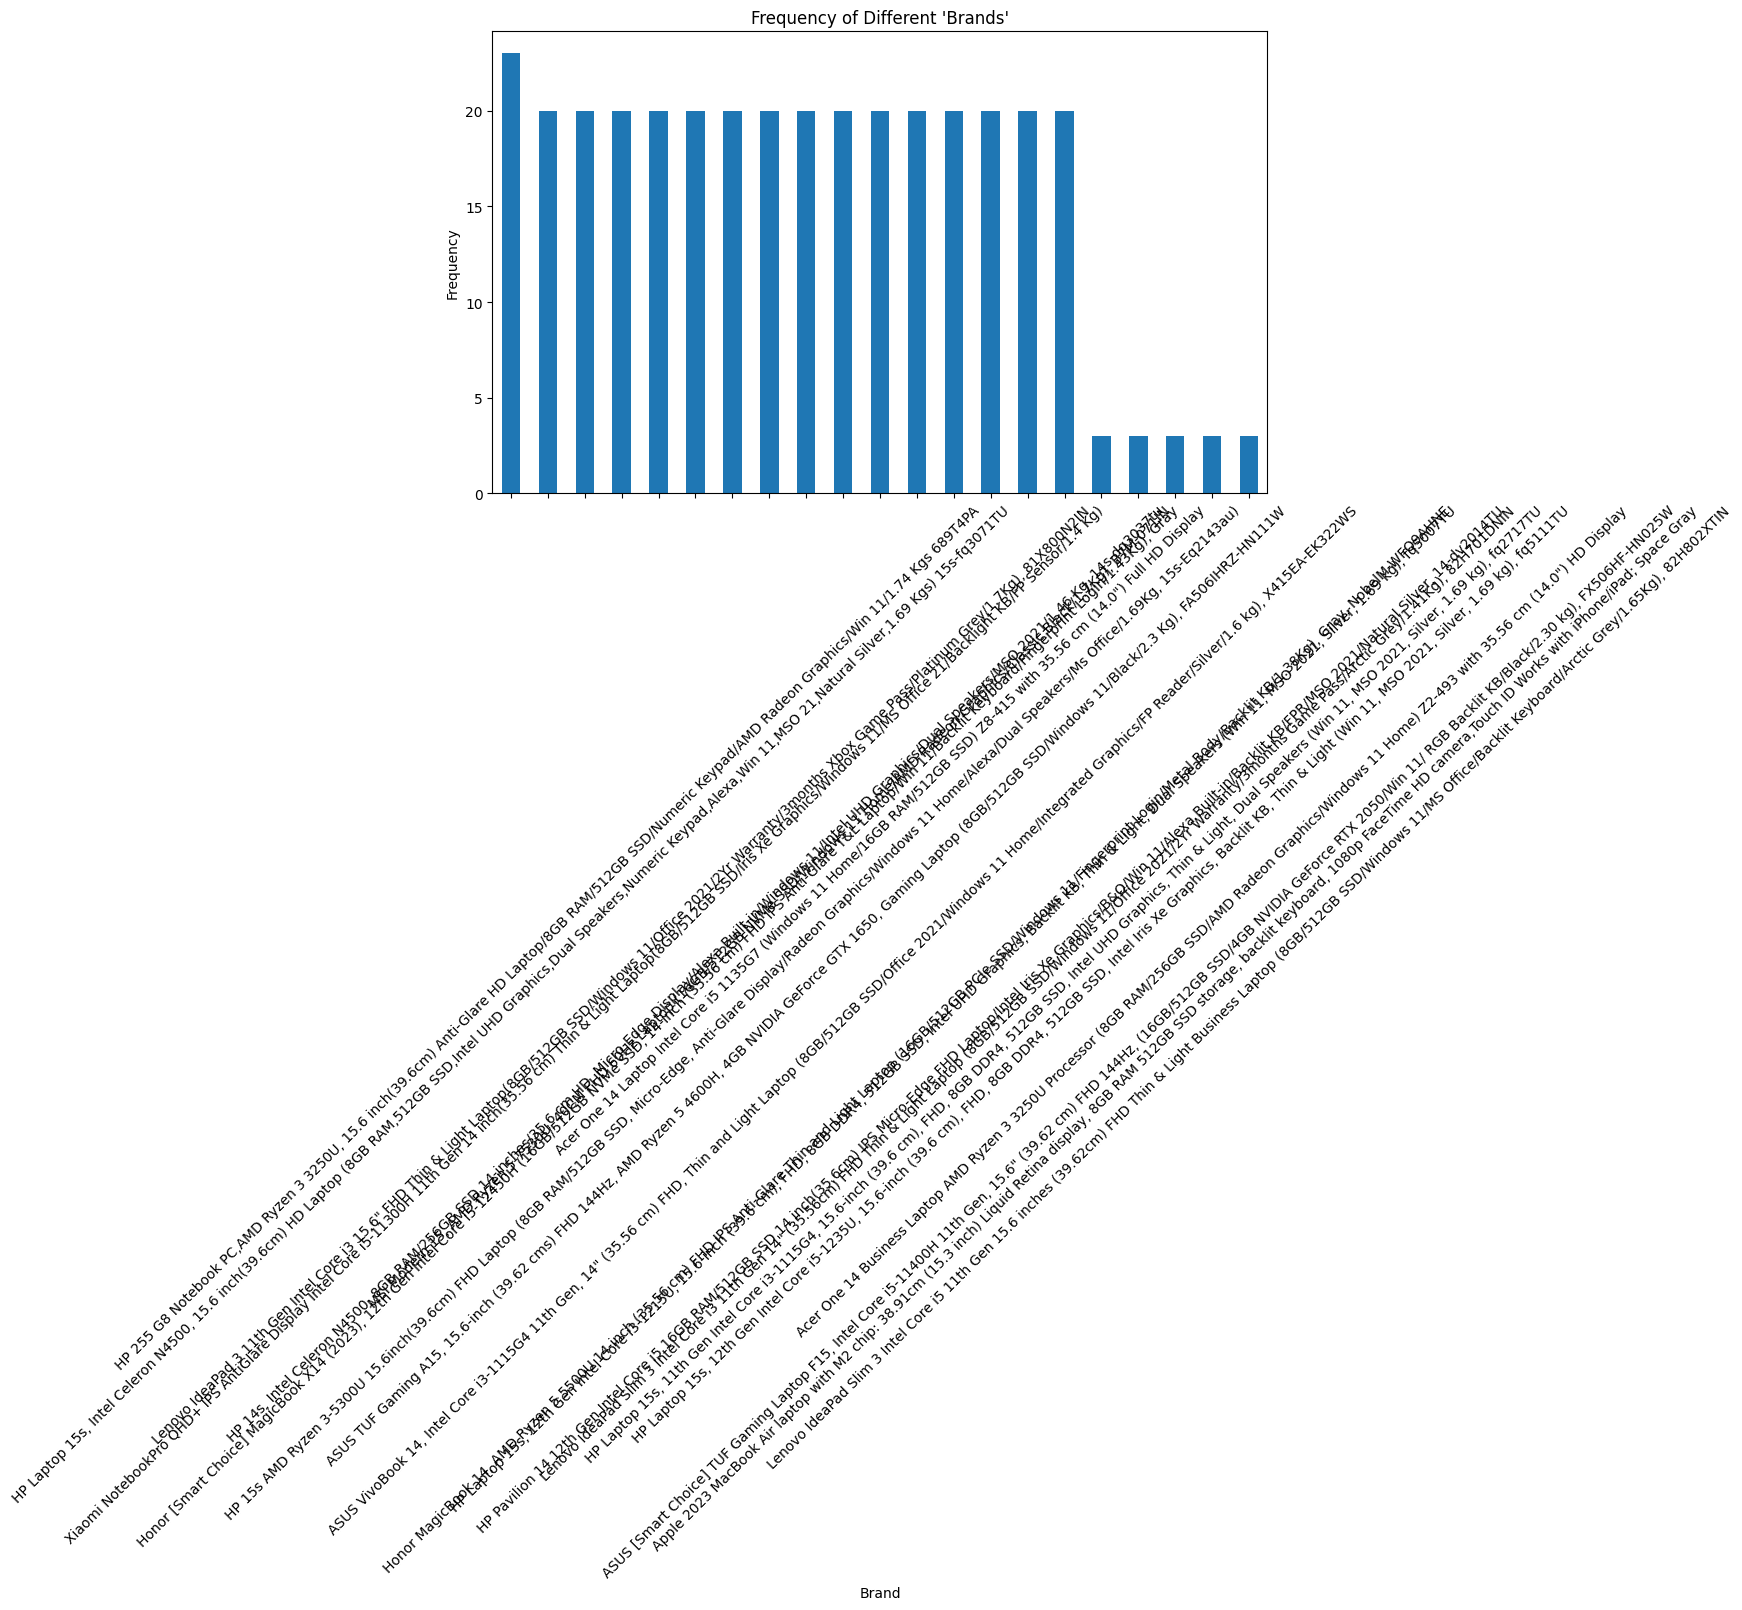

In [37]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the CSV file
# filename = "laptops.csv"  # Replace with the actual filename
# data = pd.read_csv(filename)

# # Preprocess "Price(Rs)" column to remove commas
# data["Price(Rs)"] = data["Price(Rs)"].str.replace(",", "").astype(float)

# # Convert "Rating" column to numeric data type
# data["Rating"] = pd.to_numeric(data["Rating"], errors="coerce")

# # Count the occurrences of each unique description
# brand_counts = data['Description'].value_counts()

# # Create a Bar Chart: Frequency of different "brands"
# brand_counts.plot(kind="bar", figsize=(10, 6))
# plt.title("Frequency of Different 'Brands'")
# plt.xlabel("Brand")
# plt.ylabel("Frequency")
# plt.xticks(rotation=45)
# plt.show()